In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
from utilities import plotting
from utilities import stats
from utilities import timestamps
from utilities import import_export
from utilities import polygon_selection
from mpl_toolkits.basemap import Basemap
from itertools import product
import matplotlib.pyplot as plt
from utilities.util import *
import matplotlib as mpl

def plot_radius_time_sweep(dataframe, vertical_axis, value, fig, ax, **kwargs):

    # TODO: provide option to for time axis to be "years before" instead of explicit date
    zi = dataframe.pivot(index='start_time', columns=vertical_axis, values=value)
    xi_label = [np.datetime64(z, 'Y').astype(str) for z in zi.index]
    xi = np.arange(len(xi_label))
    yi = zi.columns
    xi, yi = np.meshgrid(xi, yi)
    zi = np.ma.masked_invalid(zi).transpose()
    cbar = ax.pcolormesh(xi, yi, zi, **kwargs)
#     fig.colorbar(cbar, label=str(value))
    
    xi_ticks = [i for i, j in  enumerate(replace_unique_items(xi_label)) if j is not None]
    xi_labels = [j for i, j in  enumerate(replace_unique_items(xi_label)) if j is not None]
    
    ax.set_xticks(xi_ticks)
    ax.set_xticklabels(xi_labels, rotation=90)
    
#     ax.set_ylabel(vertical_axis)
    
    return fig, ax

In [72]:
fm_main = pd.read_csv('data/radius_time_sweep_fm_main.csv')
max_slip = pd.read_csv('data/radius_time_sweep_max_slip.csv')
high_b = pd.read_csv('data/radius_time_sweep_high_b.csv')
low_b = pd.read_csv('data/radius_time_sweep_low_b.csv')

dfs = [fm_main, max_slip, high_b, low_b]

In [74]:
fm_main.describe()

,radius,a_avg,b_avg,bstd_avg,n_avg,mc_avg,a_std,b_std,bstd_std,n_std,mc_std
count,1450.000000,1448.000000,1448.000000,1.447000e+03,1448.000000,1448.000000,1.448000e+03,1.448000e+03,1.447000e+03,1448.000000,1.448000e+03
mean,15.000000,3.717583,0.934144,3.568127e-15,2093.977074,0.744614,4.232068e-01,2.278091e-01,1.687885e-15,39.881468,4.661932e-02
std,8.369487,1.140492,0.837350,4.138893e-15,2303.334866,0.075705,1.477370e+00,7.418087e-01,1.178836e-15,27.900065,6.243575e-02
min,1.000000,1.758911,0.629270,0.000000e+00,1.000000,0.700000,1.157150e-14,2.136277e-14,0.000000e+00,0.000000,6.675867e-16
25%,8.000000,3.160849,0.712554,8.658108e-16,248.754000,0.700300,1.011689e-02,1.238632e-02,6.999920e-16,18.283668,5.471740e-03
50%,15.000000,3.729371,0.754070,1.905065e-15,1213.691000,0.710450,1.670124e-02,2.011240e-02,1.469049e-15,36.667832,2.848862e-02
75%,22.000000,4.095554,0.788798,4.245332e-15,3160.738250,0.758225,3.993592e-02,4.450117e-02,2.330899e-15,53.000861,4.986508e-02
max,29.000000,10.448730,8.685890,1.975233e-14,9161.499000,1.120293,7.776315e+00,3.797495e+00,7.321752e-15,131.025026,3.752545e-01


/home/max/anaconda2/envs/research/lib/python3.5/site-packages/ipykernel_launcher.py:19: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


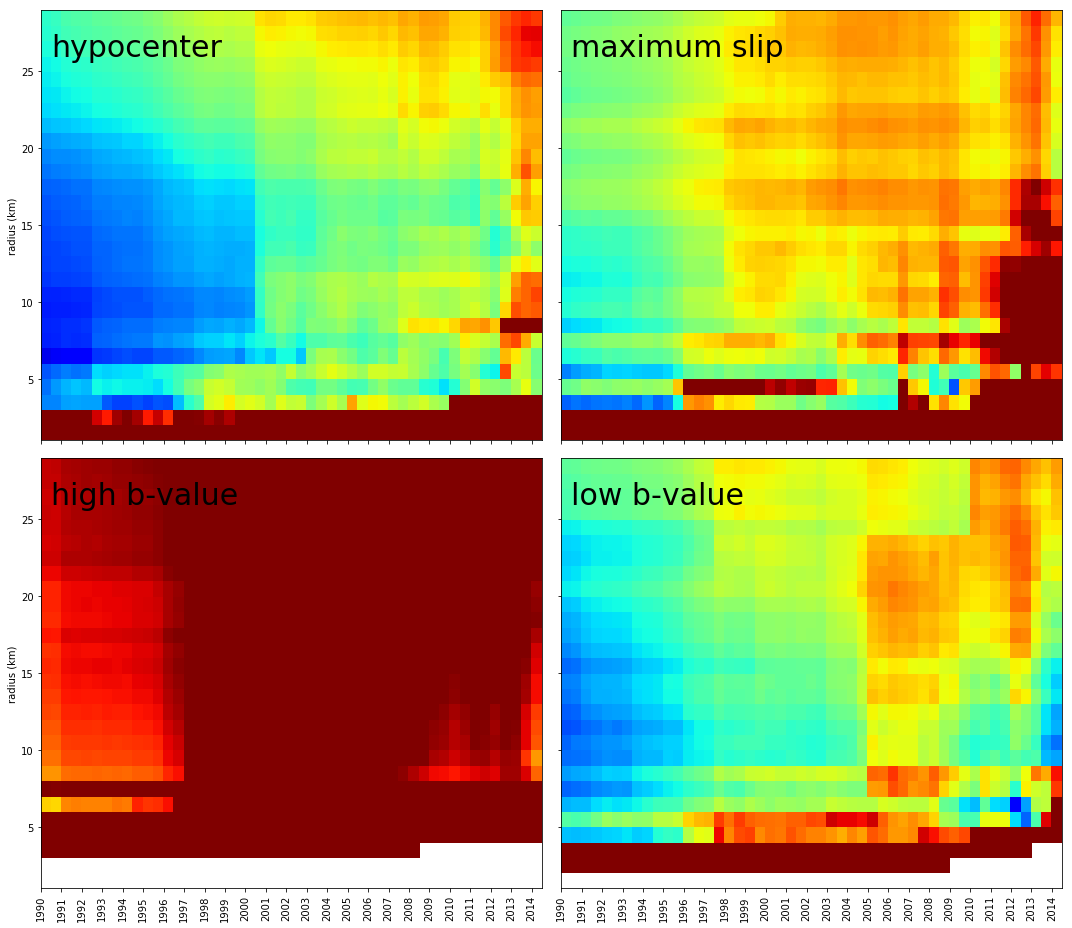

In [73]:
fig, axes = plt.subplots(2, 2, figsize=(15, 13), sharex=True, sharey=True)

axes = [item for sublist in axes for item in sublist]



titles = ['hypocenter', 'maximum slip', 'high b-value', 'low b-value']

for df, t, ax in zip(dfs, titles, axes):
    plot_radius_time_sweep(df, fig=fig, ax=ax, vertical_axis='radius', value='b_avg'
                                   ,cmap='jet', vmin=0.6, vmax=0.9)

    ax.text(s=t, x=1, y=26, fontsize=30)

axes[0].set_ylabel('radius (km)')
axes[2].set_ylabel('radius (km)')
plt.tight_layout()

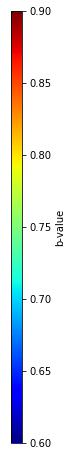

In [71]:
fig = plt.figure(figsize=(8, 2))
ax1 = fig.add_axes([0.05, 0.0, 0.02, 3])
cmap = mpl.cm.jet
norm = mpl.colors.Normalize(vmin=0.6, vmax=0.9)

# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.  There are many more kwargs, but the
# following gives a basic continuous colorbar with ticks
# and labels.
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=norm,
                                orientation='vertical')
cb1.set_label('b-value')